In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
import importlib

data_dir = '/Users/morton/Dropbox/data/tesser'

In [2]:
# load structure learning and induction data for one subject
nodes = network.temp_node_info()
struct = util.load_struct_subject(data_dir, 101)
induct = util.load_induct_subject(data_dir, 101)

In [3]:
struct.head()

,SubjNum,run,trial,objnum,file,orientnam,orientnum,resp,respnum,acc,rt,part,seqtype
0,101,1,1,9,object_17.jpg,cor,1.0,NaN,0.0,0.0,NaN,1,NaN
1,101,1,2,4,object_18.jpg,cor,1.0,c,1.0,1.0,1.479518,1,NaN
2,101,1,3,3,object_4.jpg,cor,1.0,c,1.0,1.0,1.334561,1,NaN
3,101,1,4,4,object_18.jpg,rot,0.0,n,2.0,1.0,1.065799,1,NaN
4,101,1,5,8,object_9.jpg,cor,1.0,n,2.0,0.0,1.234106,1,NaN


In [4]:
induct.head()

,SubjNum,TrialNum,QuestType,Environment,CueNum,CueObject,Opt1Num,Option1,Opt2Num,Option2,Resp,Acc,RT,cue,opt1,opt2,response,correct
0,101,1,Bound2,forest,11,object_16.jpg,7,object_35.jpg,17,object_34.jpg,1,0,5.589139,10,6,16,0,1
1,101,2,Prim,ocean,19,object_7.jpg,21,object_24.jpg,16,object_12.jpg,2,0,3.075062,18,20,15,1,0
2,101,3,Prim,ocean,2,object_28.jpg,19,object_7.jpg,9,object_17.jpg,1,1,5.394315,1,18,8,0,0
3,101,4,Prim,forest,15,object_36.jpg,13,object_30.jpg,5,object_13.jpg,1,1,5.483952,14,12,4,0,0
4,101,5,Prim,ocean,21,object_24.jpg,8,object_9.jpg,1,object_3.jpg,2,1,4.706988,20,7,0,1,1


## Vary everything

In [5]:
fixed = {}
var_names = ['alpha', 'gamma', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
param, logl = fit.fit_induct(struct, induct, fixed, 
                             var_names, var_bounds)
param

/Users/morton/PycharmProjects/tesser_successor/tesser/fit.py:45: RuntimeWarning: invalid value encountered in double_scalars
  (SR[cue, opt[0]] ** tau + SR[cue, opt[1]] ** tau))
/Users/morton/PycharmProjects/tesser_successor/tesser/fit.py:44: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((SR[cue, opt[response]] ** tau) /


{'alpha': 0.7125485797946216,
 'gamma': 0.9921113026167627,
 'tau': 2.711254057157578}

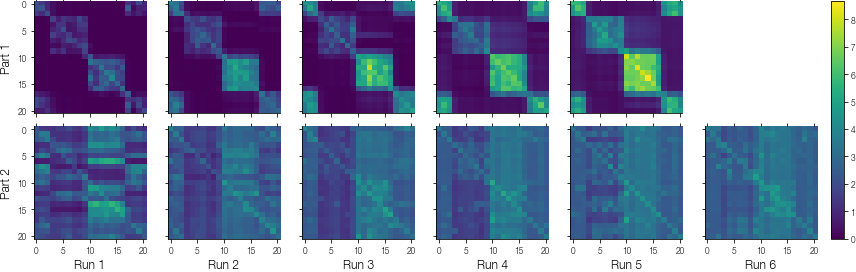

In [6]:
sr_mats = sr.learn_sr(struct, param['gamma'], param['alpha'])
fig = sr.plot_sr(sr_mats)

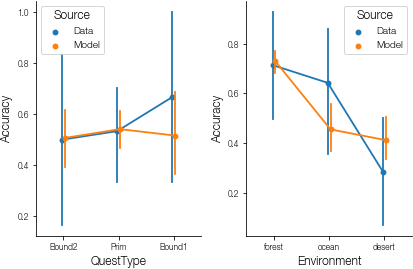

In [7]:
results = fit.assess_induct_fit_subject(struct, induct, param)
fit.plot_induct_fit(results)

## Fix alpha

In [8]:
fixed = {'alpha': .5}
var_names = ['gamma', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
param, logl = fit.fit_induct(struct, induct, fixed, 
                             var_names, var_bounds)
param

{'alpha': 0.5, 'gamma': 0.9946282740507262, 'tau': 2.292201855435818}

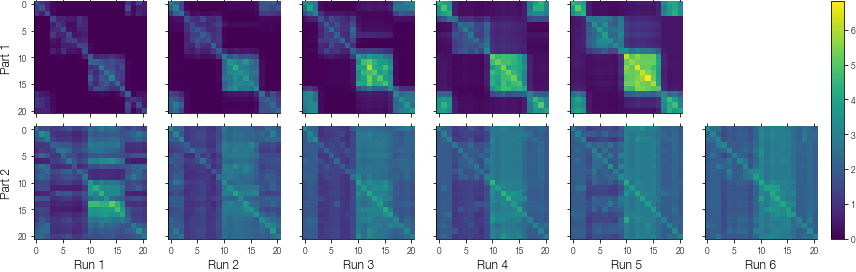

In [9]:
sr_mats = sr.learn_sr(struct, param['gamma'], param['alpha'])
fig = sr.plot_sr(sr_mats)

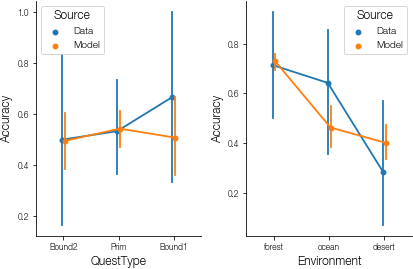

In [10]:
results = fit.assess_induct_fit_subject(struct, induct, param)
fit.plot_induct_fit(results)

## Fix gamma

In [11]:
fixed = {'gamma': .9}
var_names = ['alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
param, logl = fit.fit_induct(struct, induct, fixed, 
                             var_names, var_bounds)
param

{'gamma': 0.9, 'alpha': 0.8259196126060762, 'tau': 0.394056423339986}

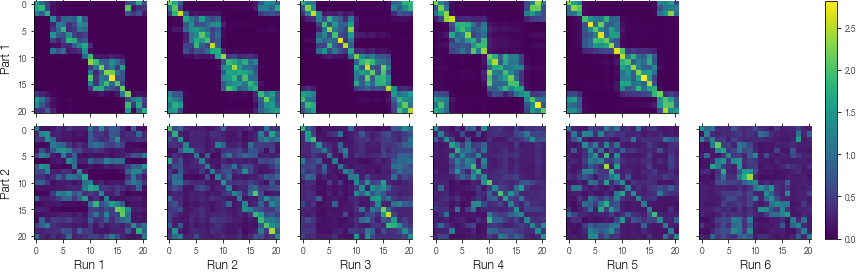

In [12]:
sr_mats = sr.learn_sr(struct, param['gamma'], param['alpha'])
fig = sr.plot_sr(sr_mats)

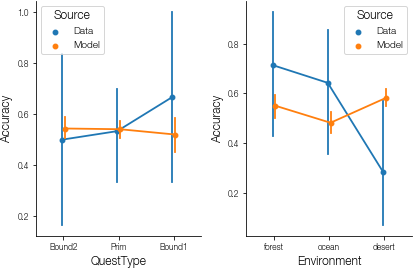

In [13]:
results = fit.assess_induct_fit_subject(struct, induct, param)
fit.plot_induct_fit(results)

## Fix tau

In [14]:
fixed = {'tau': 1}
var_names = ['alpha', 'gamma']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
param, logl = fit.fit_induct(struct, induct, fixed, 
                             var_names, var_bounds)
param

{'tau': 1, 'alpha': 0.7250691004306173, 'gamma': 1.0}

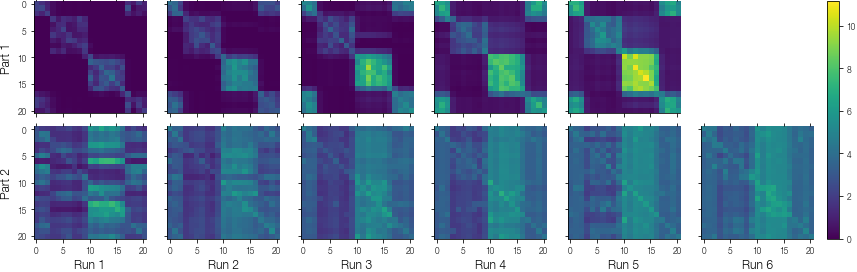

In [15]:
sr_mats = sr.learn_sr(struct, param['gamma'], param['alpha'])
fig = sr.plot_sr(sr_mats)

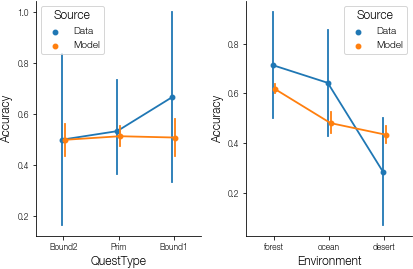

In [16]:
results = fit.assess_induct_fit_subject(struct, induct, param)
fit.plot_induct_fit(results)